## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. Define accuracy. Can an accurate model be flawed for practical use? Explain.
4. What does the SSE quantify about a particular model?
5. What are overfitting and underfitting? 
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1.1: The difference between regression and classification is the type of prediction being made. Regression is used to predict a continuous numerical value. In kNN regression, the model takes the average of the target values of the neighbors to make its prediction. In contrast, classification is used to predict a categorical value. A kNN model would assign a class label based on the majority of the nearest neighbors' classes.

1.2: A confusion table compares the predicted values of a model with its actual values. This helps us understand the accuracy of a model and its overall effectiveness by showing where it makes correct predictions and where it makes errors.

1.3: Accuracy is the proportion of correct predictions to the total number of predictions made by a model. While a model can be highly accurate in general, it can still be flawed for practical use. Therefore, accuracy alone might not reflect a model's true effectiveness in real-world applications.

1.4: The SSE quantifies the total deviation of the predicted values from the actual values of a model by measuring the overall difference between what the model predicts and its true outcomes, with each error squared. A lower SSE value means the model's predictions are close to the actual values, meaning it performs better.

1.5: Overfitting occurs when a model is too good at capturing the details of the training data, making it overly complex. As a result, it struggles to perform well on new data because it is too specialized. Underfitting occurs when a model is too simple and does not capture the important patterns in the data, leading to poor performance on both the training set and the new data.

1.6: Splitting the data into training and testing sets helps improve model performance by ensuring the model is evaluated on unseen data, which helps simulate how it will perform in real-world applications. The training set allows the model to learn patterns, while the test set evaluates how well it generalizes. Choosing k based on accuracy or SSE on the test set helps to avoid overfitting to the training data and ensure the model is tuned for generalization, which leads to better performance on new data.

1.7: Reporting a class label as a prediction provides a clear, straightforward answer, which can be useful when only one outcome is needed. However, it does not communicate the confidence in the prediction, which can be problematic when the model is uncertain or dealing with close cases. In contrast, a probability distribution gives a more detailed view of the model's confidence in its outcomes. However, it is more difficult to interpret and does not provide a single, definitive answer.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

1.1: No, there are no NA's to handle. There are 2499 rows and exactly 2499 observations for each variable, and each is a unique integer value.

1.4: As the value of k increases, the range of predicted values becomes narrower, causing the model to make more uniform predictions. It becomes less sensitive to variations in the data, which leads to less variability in the predictions for different input prices. 

1.5: The optimal k for the data is 77.

1.6: The k values under 77, including k = 3, 10, and 25, are causing underfitting. In the final graph, there is a steep drop in SSE as k increases from small values. This suggests that the model is not capturing the overall structure of the data well and is too sensitive to individual data points, leading to erratic predictions with higher variance. The intermediate values, k = 50 and 100, are close to optimal. The SSE is approaching its minimum and stabilizes. This suggests that the model has found a good balance between bias and variance, making accurate predictions. For large k values, including k = 300, the model most likely begins to overfit. The predictions become smooth and have a flattening effect where the model fails to capture outliers or other patterns, leading to horizontal bunching.

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654 

(2499, 3) 

<bound method Series.unique of 0        6300
1        2899
2        5350
3       25000
4       27700
        ...  
2494     7800
2495     9200
2496     9200
2497     9200
2498     9200
Name: price, Length: 2499, dtype: int64> 

<bound method Series.unique of 0       2008
1       2011
2       2018
3       2014
4       2018
        ... 
2494    2019
2495    2018
2496    2018
2497    2018
2498    2018
Name: year, Length: 2499, dtype: int64> 

<bound method Series.unique of 0       274117
1       190552
2        39590
3        64146
4         6654
         ...  
2494     23609
2495     34553
2496     31594
2497     32557
2498     31371
Name: mileage, Length: 2499, dtype: int64> 



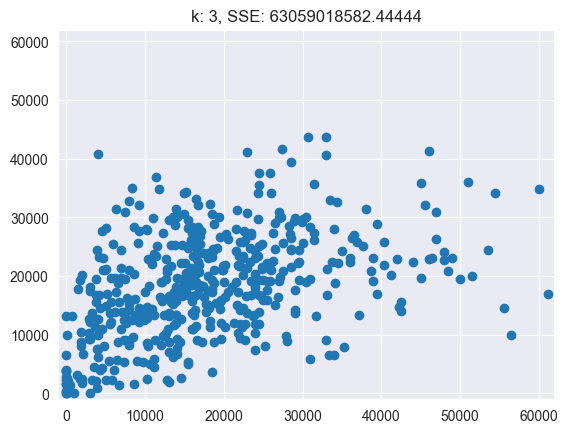

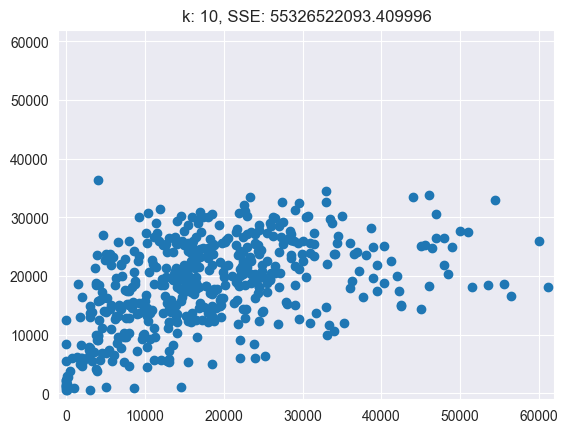

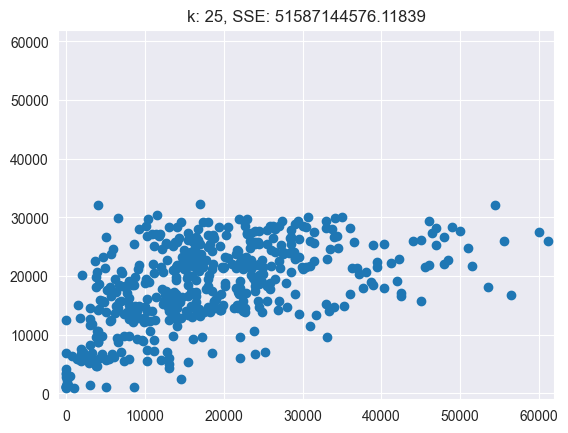

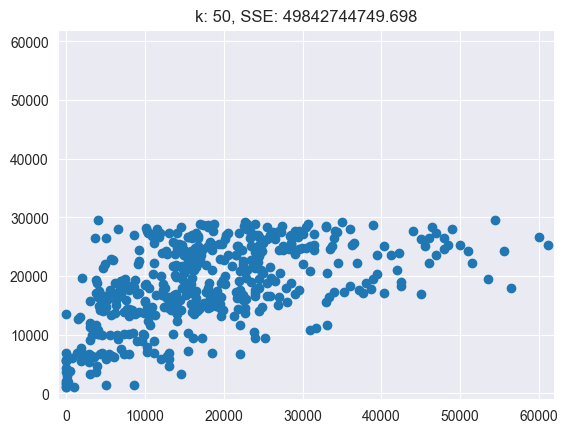

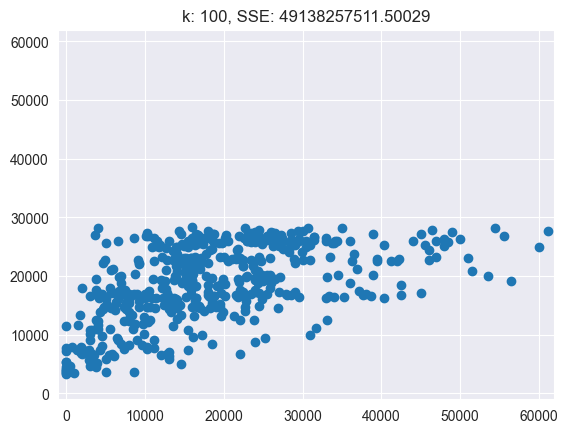

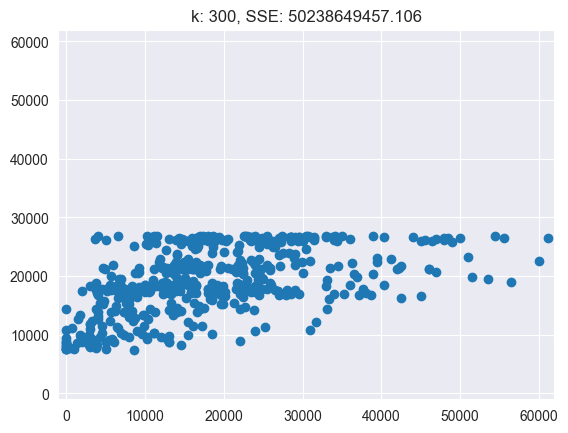

[77]


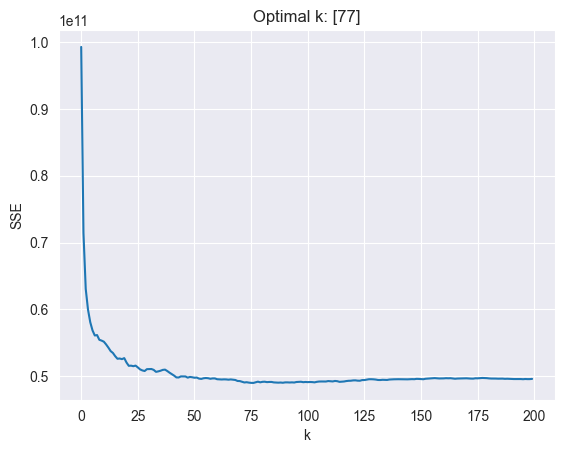

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# 1: Load dataset
df = pd.read_csv('./data/USA_cars_datasets.csv')
df = df.loc[:, ['price', 'year', 'mileage']]
print(df.head(), '\n')
print(df.shape, '\n') # 3 columns, 2499 rows
print(df['price'].unique, '\n') # dtype: int, 2499 observations
print(df['year'].unique, '\n') # dtype: int, 2499 observations
print(df['mileage'].unique, '\n') # dtype: int, 2499 observations

# 2: Maxmin normalize year and mileage
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

# 3: Split the sample
y = df['price']
X = df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

# 4: Use kNN algorithm on training data
for k in [3, 10, 25, 50, 100, 300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum((y_test-y_hat)**2)
    
    plot, axes = plt.subplots()
    plt.scatter(y_test, y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(-1000, 62000)
    axes.set_xlim(-1000, 62000)
    plt.show()

# 5: Determine the optimal k
k_bar = 200
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train, y_train) 
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((y_test-y_hat)**2)
 
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar), SSE)
plt.xlabel("k")
plt.title("Optimal k: "+str(k_star))
plt.ylabel('SSE')
plt.show()

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.